# Week 1 Read the resources

1. Understanding of the problem/ Research/Hypothesis 
2. Get the data/
Where is it/
Can you process it? 

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Import package

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns; sns.set()
# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 1. Data Extraction

### Download and Prepare PHM08 dataset

In [2]:
df=pd.read_csv('/Users/philippebeliveau/Desktop/BSTA 478/Projet/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Divide data set between features and target
features=df.drop(['Class'], axis=1)
target = df['Class']

In [4]:
target_df=pd.DataFrame(target)

Information about the dataset: 

 The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

What does the columns represent:

PCA features
This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

PCA features are not correlated
It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.!

So those columns are those PCA features

# Week 2 Perform EDA
2. Data cleaning: 
Define standards, drop columns, missing values, feature engineering 
    
3. Data visualization  (EDA): Derived insight from the data and engine



## 1. Data cleaning
### 2.1 Define standards, drop columns, missing values, feature engineering 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
print('The dataframe has {} rows'.format(df.shape[0]))
print('The dataframe has {} columns'.format(df.shape[1]))

The dataframe has 284807 rows
The dataframe has 31 columns


### Missing Values?

Make sure that our dataset does not possess any NaN values, and give some explanantion about what would this entails if we had some

In [ ]:
# Look for NA values
df.isna().sum()

After having clean missing value, we are now left with this DataFrame to perform our EDA 

## Balance Dataset = No need for autoencoders

## Conclusion of EDA

In [ ]:
#Question to ask: 
# are we including the settings names?
# So what are we face off? 
# What else could I add in my EDA?

# Week 3 (19 – 5 march)  Perform the data preparation 
4. Data partitioning 
5. Data preparation 
6. Scaling
6. Feature selection and creation 
4. Test of Stationarity for all features
4. Lag values + AR + MA terms 
4. Multicollinearity
	


## 1. Data preprocessing 

### Data partitioning

It is now important to drop the columnns that are insignificant or that are literaly giving the information about the Remaining useful life. Think about it, when a new engine is functioning, what information do we have about it, we can't have the max cycles that he reached, because he is still running.

And, we can't give him our model the RUL, because this is what we are trying to predict

### 2. Scaling

Question: 

Why scaling?

In [5]:
X = np.array(features).astype(np.float)

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [6]:
X_scaled_df = pd.DataFrame(X_scaled)
target_df = pd.DataFrame(target)

### 3. Feature selection and creation

### 4. Feature selection

#### Benchmark model

#### Reduce number of features down to the one selected

## Week 4 (5 march – 19 march) Algorithm
7.Data format to enter in the algorithm (This will change given the algorithm) 

8.Implementation of the algorithms/ Which one to use? /hyperparameter tuning (Grid search) 


# Tree Algorithm

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, target_df
                                                    , test_size=0.2
                                                    , random_state=42)

print(y_train.shape)
print(y_test.shape)

(227845, 1)
(56962, 1)


In [9]:
# Source: https://trenton3983.github.io/files/projects/2019-07-19_fraud_detection_python/2019-07-19_fraud_detection_python.html

def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model, max_iter = 1000000):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

#### Ensemble method

In [10]:
# Import the package
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [11]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(random_state=5)
clf2 = RandomForestClassifier(criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5)
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model, max_iter = 1000000)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KeyboardInterrupt: 

#### Random Forest Classifier

In [67]:
clf2 = RandomForestClassifier(criterion='gini', max_depth=10, max_features='log2',
            min_samples_leaf=8, n_estimators=100, n_jobs=1, random_state=42)

clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=8,
                       n_jobs=1, random_state=42)

In [68]:
# Predict 

predicted = clf2.predict(X_test)
probs = clf2.predict_proba(X_test)
print(roc_auc_score(y_test, probs[:,1]))

0.999685820105722


In [69]:
# Score
clf2.score(X_test, y_test)

0.9906090076147934

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     56750
           1       1.00      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726


Confusion Matrix:
[[56673    77]
 [  991 55985]]


#### How does our model perform on non-resample dataset? 

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

no_resampled_predict = clf2.predict(features)

# Classification report
print('\nClassification Report:')
print(classification_report(target, no_resampled_predict))
print('\nConfusion Matrix:')
print(confusion_matrix(target, no_resampled_predict))

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names




Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.78      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.87      0.54    284807
weighted avg       1.00      0.97      0.98    284807


Confusion Matrix:
[[276444   7871]
 [   110    382]]


In [90]:
print('sum of the fraud is {}'.format(df[df['Class']==1].count().sum()))
print('From the fraud that have been correclty predicted fraud', (382/1525)*100,'%')

sum of the fraud is 15252
From the fraud that have been correclty predicted fraud 25.049180327868854 %


In [76]:
# Obtain precision and recall
precision, recall, _ = precision_recall_curve(target, no_resampled_predict)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.00172749 0.0462862  1.        ]
Recall: [1.         0.77642276 0.        ]


## Interpretation of Classification Matrix

We see that our model hasn't been able to well classify the fraud from the non-fraud, as the precision is 5% 

Now the question should be how to minimize the False Positive rate (False Positive is: The model predict that it is not a fraud, but in fact it is.) We want to maximize the True negative, meaning we predict it's a fraud, while it is actually a fraud. The negative represents fraud (1) and positive non-fraud (0). 

### Conclusion on Tree

Those model are clearly not good enough for this task, even tho we could look for hyperparameter tuning, we seem to be overfitting with the resampled data with whatever I tried and it performs really badly when apply on the non-resampled set. 

Although, because the non-resampled set is not being scale and the dataset that we trained on is scale, it might have an impact. I should confirm this. 

## Autoencoders

https://towardsdatascience.com/applying-anomaly-detection-with-autoencoders-to-fraud-detection-feaaee6b5b09

The Autoencoder will encode our data into a subspace and decode the feature back while normalizing the data. Our expectation is autoencoder will learn the features of normal transactions and the input will be similar to output when applied. 

For anomalies, the input and the output will be significantly different since it is unexpected data.


The good part of this approach is it allows us to use unsupervised learning and we usually have plenty of normal transaction data. Data labeling is usually expensive, hard, and in some cases unavailable. Manual data labeling also includes human interaction which causes human biased implementations. It can be seen that in the model training we only use normal transaction features and not the labels.

## Why AE and what questions to ask

What will be our input? 

What does represent our latent layer? 

What will represent our output? 

How to define the nodes? 

What is the idea of a threshold to detect anomalies? 

The idea behind the application of an autoencoders in the context of fraud prediction is that we will give as inputs the transactions, we hope to learn the features of the normal transactions in the encoder, we flatten the information in a flatten layer, making the latent space. Then, we hope that the decoder recreates the observations as normal transaction. Then when the decoder transform back the observations as if they were non-fraud observations. Given those reconstructed observations that are supposedly non-fraud observations, we can now see which observations have big loss function. Those will potentially be our fraud case. 

I believe autoencoders will be really useful for this task as we have very few fraud transactions, which gives the opportunity to the encoder in learning the normal transactions features and patterns. 

### 1. Data format 

# Narrative

We have to train our model on the normal transactions and give the anomaly to predict to the AE. Then, we will look at the prediction of the AE and see if there is a large disruption between the actual value 
and the predicted value. If there is a big difference, we might flag this transaction as an anomaly. 



In [12]:
# So let's build the normal and anomaly data. 

# Dataframe
y = np.array(target_df).astype(np.float)
df_input = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame({'Y_Fraud_N':y.flatten()})], axis=1)

df_non_fraud= df_input[df_input['Y_Fraud_N']==0]
df_fraud = df_input[df_input['Y_Fraud_N']==1]

# Take off the Y_Fraud_N variable 

df_non_fraud = df_non_fraud.drop('Y_Fraud_N', axis=1)
df_fraud = df_fraud.drop('Y_Fraud_N', axis=1)

print('Shape of non_fraud {}'.format(df_non_fraud.shape))

print('Shape of fraud {}'.format(df_fraud.shape))

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Shape of non_fraud (284315, 30)
Shape of fraud (492, 30)


In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_non_fraud, test_size=0.2)

n_features= df_non_fraud.shape[1]

### 2. Implementation of the algorithms 

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing, model_selection
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
import seaborn as sns
import keras
import tensorflow as tf

dataset_seed : Random seed for shuffling dataset

scale : % of the dataset to use (1. for 100%)

latent_dim : Dimension of the latent space

train_prop : Percentage for train (the rest being for the test)

batch_size : Batch sizeepochs : Nb of epochs for training\

fit_verbosity is the verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [15]:
dataset_seed     = 123

scale            = 1

latent_dim       = 10

train_prop       = .8
batch_size       = 128
epochs           = 30
fit_verbosity    = 1

## Encoder

In [16]:
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=30, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=15, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

2022-04-03 13:27:03.918200: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Decoder

In [17]:
decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=15, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=30, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

## Autoencoder

In [18]:
autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
loss=losses.MSE,
optimizer=tf.optimizers.SGD(),
metrics=[metrics.mean_squared_error])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7057/7108 [============================>.] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd593472b00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

Epoch 39/100
7108/7108 [==============================] - 7s 958us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 40/100
7108/7108 [==============================] - 7s 958us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 41/100
7108/7108 [==============================] - 7s 966us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 42/100
7108/7108 [==============================] - 7s 936us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 43/100
7108/7108 [==============================] - 7s 968us/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 44/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_squared_error: 0

7108/7108 [==============================] - 7s 966us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 89/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 90/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 91/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 92/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 93/100
7108/7108 [==============================] - 7s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 94/100
71

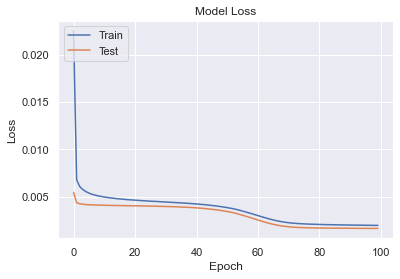

In [19]:
# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, restore_best_weights=True)
history = autoencoder.fit(x=train_set, y=train_set, epochs=100, verbose=1, validation_data=[test_set, test_set], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Prediction

In [20]:
train_predicted_x = autoencoder.predict(x=train_set)
train_events_mse = losses.mean_squared_error(train_set, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
plot_samples = 492
# normal event
real_x = test_set[:plot_samples].values.reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=real_x)
normal_events_mse = losses.mean_squared_error(real_x, predicted_x)
normal_events_df = pd.DataFrame({
'mse': normal_events_mse,
'n': np.arange(0, plot_samples),
'anomaly': np.zeros(plot_samples)})

In [27]:
# abnormal event
abnormal_x =df_fraud[:plot_samples].values.reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mse = losses.mean_squared_error(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
'mse': abnormal_events_mse,
'n': np.arange(0, plot_samples),
'anomaly': np.ones(plot_samples)})

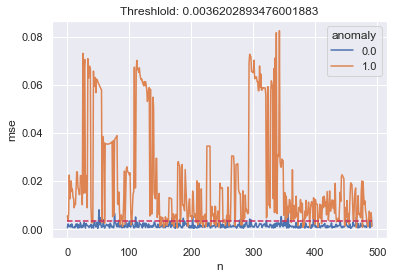

In [28]:
import matplotlib.lines as lines
mse_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mse_df.n, y=mse_df.mse, hue=mse_df.anomaly)

line = lines.Line2D(
xdata=np.arange(0, plot_samples),
ydata=np.full(plot_samples, cut_off),
color='#CC2B5E',
linewidth=1.5,
linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off))
plt.show()

### 3. Hyperparameter tuning 

# Week 5 (19 march – 2 april) 
9. Model performance

10. Performance measures (RMSE, MAE,…) 
    
11. Feature importance

12. Evaluation of the results (Overfitting )
	
13. Interpretation of the results  



### 1. Performance measure

RMSE 
MAE
(...)

In [29]:
mse_abnormal = pd.DataFrame(abnormal_events_mse)

In [30]:
good = []
bad=[]
def classify(mse, cutoff): 
    for row in mse_abnormal.itertuples(index=False):
        if row >= cutoff:
            count_good  =good.append(1)
        else: 
            count_bad = bad.append(0)  

In [31]:
classify(pd.DataFrame(abnormal_events_mse), cut_off)
print('The ratio of well classify abnormal transactions is:{}'.format((len(good)/len(mse_abnormal))))

The ratio of well classify abnormal transactions is:0.8414634146341463


### 3. Evaluation of the results

The ratio of well classify abnormal transactions is:84% 

### 4. Interpretation of the results

When looking at the graph above, we see that the model have larger MSE in most of the case when he is predicting on non-normal transactions. Which is exactly what we wants, as the goal of the autoencoders is to recreate those datapoints into the original form (what he has learn in the training) 

# Week 6 (2 april – 10 april) 
10. Develop presentation

11. Wrapping up
